<a href="https://colab.research.google.com/github/TienLungSun/LLM/blob/main/Video%20process%20examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

我先問 ChatGPT 一個簡單的程式: python 把 mp4 video 檔的 frame1~9  每張 frame 先縮小1/3, 以 3x3 拼接成一張大圖後, 再把大圖縮小 1/10 後畫出來, 然後再把ChatGPT給的程式修改一下即可

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
from IPython.display import clear_output
import time

In [2]:
# 定義將9張縮小的圖片拼接成3x3大圖的函數
def form_large_img(frameLst):
    # 確保傳入的圖片數量為9
    if len(frameLst) != 9:
        raise ValueError("圖片數量必須是9張")

    # 取得圖片的寬和高（假設所有圖片大小相同）
    width, height = frameLst[0].size

    # 設定拼接後大圖的寬和高
    new_width = width * 3
    new_height = height * 3

    # 建立空白的大圖
    new_img = Image.new('RGB', (new_width, new_height))

    # 將每張圖片按照 3x3 排列貼上去
    for i, img in enumerate(frameLst):
        x = (i % 3) * width
        y = (i // 3) * height
        new_img.paste(img, (x, y))

    return new_img

frame No: 42


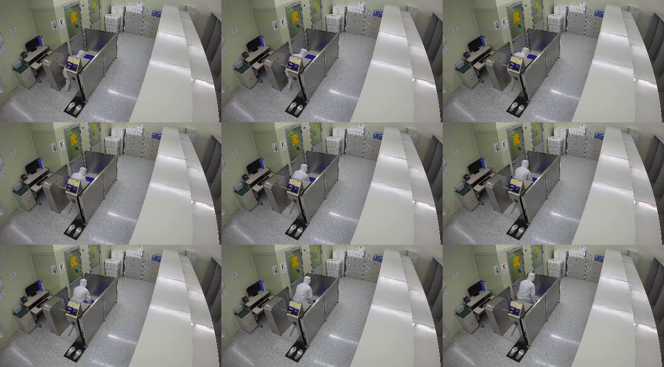

In [3]:
# 設定要讀取的視頻文件路徑
video_path = "entrance_mo.mp4"

# 使用 OpenCV 讀取視頻
cap = cv2.VideoCapture(video_path)

# 檢查是否成功打開視頻文件
if not cap.isOpened():
    print("無法開啟視頻文件")
else:
    frameNo = 0
    frameLst = []
    while cap.isOpened():
        # 逐幀讀取視頻
        ret, frame = cap.read()
        frameNo += 1

        # 如果成功讀取到幀
        if not ret:
            break
        else:
            # 將每張圖片縮小1/3
            resized_frame = cv2.resize(frame, (0, 0), fx=1/3, fy=1/3)

            # 將BGR轉換為RGB格式
            frame_rgb = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
            # 將NumPy陣列轉為Pillow的Image對象
            image = Image.fromarray(frame_rgb)

            # 將縮小後的圖片加入列表
            if frameNo <= 9:
              frameLst.append(image)
            else:
              frameLst.pop(0)
              frameLst.append(image)

              # 將9張縮小的圖片拼接成3x3大圖
              large_img = form_large_img(frameLst)

              # 將拼接後的大圖再縮小1/10 以方便顯示
              large_img_resized = large_img.resize((large_img.width//2, large_img.height//2))

              # 將Pillow Image轉換回NumPy陣列以便顯示
              large_img_np = np.array(large_img_resized)

              # 將RGB格式轉換回BGR以便用OpenCV顯示
              large_img_bgr = cv2.cvtColor(large_img_np, cv2.COLOR_RGB2BGR)

              # 清除先前顯示的幀
              clear_output(wait=True)

              # 使用cv2_imshow來顯示縮小後的大圖
              print("frame No:", frameNo)
              cv2_imshow(large_img_bgr)

              # 控制播放速度 (例如每秒25幀)
              time.sleep(0.1)  # 0.04 秒大約等於 25 fps

# 釋放視頻對象
cap.release()

# 關閉所有窗口
cv2.destroyAllWindows()